# 非線形計画法(制約あり)
非線形計画の制約がある場合をやっていきます。制約も線形で表せる線形制約と線形で表せない非線形制約があります。  

## Constrained minimization of multivariate scalar functions (minimize)
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#constrained-minimization-of-multivariate-scalar-functions-minimize  
https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#trust-region-constrained-algorithm-method-trust-constr

In [404]:
from scipy.optimize import minimize, BFGS, LinearConstraint, NonlinearConstraint, Bounds
import numpy as np

### 例題1.1 １変数、線形制約
わかりやすい数理計画法 (森北). 
P128 例6.1  
minimize $f(x) = x^2 -2x$  
subject to :  
$g_1(x) = -x \leq 0$  
$g_2(x) = x - 2 \leq 0$  

$x \geq 0$  
$x \leq 2$  

$0 \leq x \leq 2$

最適値は$x = 1$のとき、最小値-1

In [405]:
#目的関数
def f1_1(x):
    return x**2 -2 * x

In [406]:
#線形制約
A = np.array([1])
lb = np.array([0])
ub = np.array([2])
linear_constraint = LinearConstraint(A, lb, ub)

In [407]:
x0 = np.array([0.5])
res = minimize(f1_1, x0, method='trust-constr', jac="2-point", hess=BFGS(),
               constraints=[linear_constraint],
               options={'verbose': 2})
print(res.x)
print('x = {0}のとき最小値 : {1}'.format(res.x[0],f1_1(res.x[0])))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   2   |   0   | -7.5000e-01 | 1.00e+00 | 4.80e-01 | 0.00e+00 |
|   2   |   4   |   1   | -9.5046e-01 | 2.00e+00 | 1.48e-01 | 0.00e+00 |
|   3   |   6   |   2   | -9.9990e-01 | 2.71e+00 | 7.26e-03 | 0.00e+00 |
|   4   |   6   |   2   | -9.9990e-01 | 1.36e+01 | 6.73e-03 | 0.00e+00 |
|   5   |   6   |   2   | -9.9990e-01 | 6.79e+01 | 6.63e-03 | 0.00e+00 |
|   6   |   8   |   3   | -1.0000e+00 | 6.79e+01 | 2.12e-05 | 0.00e+00 |
|   7   |   8   |   3   | -1.0000e+00 | 3.39e+02 | 2.11e-05 | 0.00e+00 |
|   8   |   8   |   3   | -1.0000e+00 | 1.70e+03 | 2.11e-05 | 0.00e+00 |
|   9   |   8   |   3   | -1.0000e+00 | 8.48e+03 | 2.11e-05 | 0.00e+00 |
|  10   |   8   |   3   | -1.0000e+00 | 4.24e+04 | 2.11e-05 | 0.00e+00 |
|  11   |  10   |   4   | -1.0000e+00 | 4.24e+04 | 4.97e-09 | 0.00e+00 |

`gtol` termination condition is satisfied.
Number 

### 例題1.2 1変数、線形制約 
わかりやすい数理計画法 (森北) P128 例6.2  
minimize $f(x) = x^2 -2x$  
subject to  
$g_1(x) = -x + 2 \leq 0$  
$g_2(x) = x - 3 \leq 0$

$2 \leq x \leq 3$  
$x = 2$のとき、最小値0  


In [408]:
#線形制約
A = np.array([1])
lb = np.array([2])
ub = np.array([3])
linear_constraint = LinearConstraint(A, lb, ub)

In [409]:
x0 = np.array([0.5])
res = minimize(f1_1, x0, method='trust-constr', jac="2-point", hess=BFGS(),
               constraints=[linear_constraint],
               options={'verbose': 2})
print(res.x)
print('x = {0}のとき最小値 : {1}'.format(res.x[0],f1_1(res.x[0])))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   2   |   0   | -7.5000e-01 | 1.00e+00 | 5.18e-01 | 1.50e+00 |
|   2   |   4   |   1   | -8.1652e-01 | 2.00e+00 | 3.66e-01 | 5.72e-01 |
|   3   |   6   |   2   | -9.1604e-01 | 2.02e+00 | 4.83e-04 | 7.10e-01 |
|   4   |   8   |   3   | -3.0262e-02 | 4.05e+00 | 1.00e-03 | 1.52e-02 |
|   5   |   8   |   3   | -3.0262e-02 | 2.02e+01 | 1.14e-04 | 1.52e-02 |
|   6   |  10   |   4   | +1.9485e-02 | 2.02e+01 | 2.18e-06 | 0.00e+00 |
|   7   |  10   |   4   | +1.9485e-02 | 1.01e+02 | 1.51e-04 | 0.00e+00 |
|   8   |  12   |   5   | +4.1024e-03 | 1.01e+02 | 2.35e-07 | 0.00e+00 |
|   9   |  12   |   5   | +4.1024e-03 | 5.06e+02 | 6.78e-06 | 0.00e+00 |
|  10   |  14   |   6   | +8.0492e-04 | 5.06e+02 | 2.17e-09 | 0.00e+00 |

`gtol` termination condition is satisfied.
Number of iterations: 10, function evaluations: 14, CG iterations: 6, optimality

### 例題1.3 1変数、線形制約   
わかりやすい数理計画法 (森北) P129 例6.3  
minimize $f(x) = x^2 -2x$  
subject to  
$g_1(x) = -x - 1 \leq 0$  
$g_2(x) = x \leq 0$  

$-1 \leq x \leq 0$   
$x = 0$のとき、最小値0

In [410]:
#線形制約
A = np.array([1])
lb = np.array([-1])
ub = np.array([0])
linear_constraint = LinearConstraint(A, lb, ub)

In [411]:
x0 = np.array([0.5])
res = minimize(f1_1, x0, method='trust-constr', jac="2-point", hess=BFGS(),
               constraints=[linear_constraint],
               options={'verbose': 2})
print(res.x)
print('x = {0}のとき最小値 : {1}'.format(res.x[0],f1_1(res.x[0])))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   2   |   0   | -7.5000e-01 | 1.00e+00 | 4.30e-01 | 5.00e-01 |
|   2   |   4   |   1   | -8.6962e-01 | 7.00e+00 | 1.53e-03 | 6.39e-01 |
|   3   |   6   |   2   | +1.9058e-01 | 8.93e+00 | 1.10e-02 | 0.00e+00 |
|   4   |   8   |   3   | +9.6146e-02 | 8.93e+00 | 1.53e-04 | 0.00e+00 |
|   5   |   8   |   3   | +9.6146e-02 | 4.47e+01 | 3.71e-03 | 0.00e+00 |
|   6   |  10   |   4   | +2.1997e-02 | 4.47e+01 | 2.56e-05 | 0.00e+00 |
|   7   |  10   |   4   | +2.1997e-02 | 2.23e+02 | 1.99e-04 | 0.00e+00 |
|   8   |  12   |   5   | +4.1415e-03 | 2.23e+02 | 3.19e-07 | 0.00e+00 |
|   9   |  12   |   5   | +4.1415e-03 | 1.12e+03 | 6.92e-06 | 0.00e+00 |
|  10   |  14   |   6   | +8.0505e-04 | 1.12e+03 | 2.23e-09 | 0.00e+00 |

`gtol` termination condition is satisfied.
Number of iterations: 10, function evaluations: 14, CG iterations: 6, optimality

### 例題1.4 多変数、線形制約
わかりやすい数理計画法 (森北) P133 例6.4  
minimize $f(x_1, x_2) = 3x_1^2 - 18x_1 + 2x_2^2 - 8x_2$  
subject to  
$g_1(x) = 3x_1 + 12x_2 -48 \leq 0$  
$g_2(x) = 9x_1 + 6x_2 - 54 \leq 0$  
$g_3(x) = -x_1 \leq 0$  
$g_4(x) = -x_2 \leq 0$  

$x_1 + 4x_2 \leq 16$  
$3x_1 + 2x_2 \leq 18$  
$x_1 \geq 0$  
$x_2 \geq 0$  

制約条件(線形制約)  
$  
\left(
\begin{array}{r}
-\infty \\
-\infty \\
0 \\
0 \\
\end{array}
\right)
\leq
\left(
\begin{array}{rr}
1 & 4 \\
3 & 2 \\
1 & 0 \\
0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{r}
x_1 \\
x_2 \\
\end{array}
\right)
\leq 
\left(
\begin{array}{r}
16 \\
18 \\
\infty \\
\infty \\
\end{array}
\right)
$ 
   
$(x_1, x_2) = (3, 2)$のとき、最小値-35

In [412]:
#目的関数
def f1_4(x):
    return 3 * x[0]**2 - 18 * x[0] + 2 * x[1]**2 -8 * x[1]

In [413]:
#線形制約
A = np.array([[1,4],[3,2],[1,0],[0,1]])
lb = np.array([-np.inf,-np.inf,0,0])
ub = np.array([16,18,np.inf,np.inf])
linear_constraint = LinearConstraint(A, lb, ub)

In [414]:
x0 = np.array([0.5, 0.5])
res = minimize(f1_4, x0, method='trust-constr', jac="2-point", hess=BFGS(),
               constraints=[linear_constraint],
               options={'verbose': 2})
print(res.x)
print('x = {0}のとき最小値 : {1}'.format(res.x,f1_4(res.x)))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   3   |   0   | -1.1750e+01 | 1.00e+00 | 7.44e+00 | 0.00e+00 |
|   2   |   6   |   1   | -2.2224e+01 | 7.00e+00 | 6.08e+00 | 0.00e+00 |
|   3   |   9   |   3   | -3.4960e+01 | 2.05e+01 | 1.93e-01 | 0.00e+00 |
|   4   |  12   |   5   | -3.4998e+01 | 2.05e+01 | 3.92e-02 | 0.00e+00 |
|   5   |  12   |   5   | -3.4998e+01 | 1.02e+02 | 6.20e-02 | 0.00e+00 |
|   6   |  15   |   7   | -3.5000e+01 | 1.02e+02 | 9.32e-03 | 0.00e+00 |
|   7   |  15   |   7   | -3.5000e+01 | 5.12e+02 | 1.07e-02 | 0.00e+00 |
|   8   |  18   |   9   | -3.5000e+01 | 5.12e+02 | 8.21e-04 | 0.00e+00 |
|   9   |  18   |   9   | -3.5000e+01 | 2.56e+03 | 1.19e-03 | 0.00e+00 |
|  10   |  21   |  10   | -3.5000e+01 | 2.56e+03 | 4.13e-04 | 0.00e+00 |
|  11   |  21   |  10   | -3.5000e+01 | 1.28e+04 | 5.60e-04 | 0.00e+00 |
|  12   |  24   |  12   | -3.5000e+01 | 1.28e+04 | 

/usr/local/lib/python3.7/dist-packages/scipy/optimize/_hessian_update_strategy.py:187: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  'approximations.', UserWarning)


### 例題1.5 多変数、線形制約
わかりやすい数理計画法 (森北) P133 例6.5  
minimize $f(x_1, x_2) = 3x_1^2 - 18x_1 + 2x_2^2 - 8x_2$  
subject to  
$g_1(x) = 3x_1 + x_2 -9 \leq 0$  
$g_2(x) = 3x_1 + 5x_2 - 15 \leq 0$  
$g_3(x) = -x_1 \leq 0$  
$g_4(x) = -x_2 \leq 0$  

$3x_1 + x_2 \leq 9$  
$3x_1 + 5x_2 \leq 15$  
$x_1 \geq 0$  
$x_2 \geq 0$  

制約条件(線形制約)  
$  
\left(
\begin{array}{r}
-\infty \\
-\infty \\
0 \\
0 \\
\end{array}
\right)
\leq
\left(
\begin{array}{rr}
3 & 1 \\
3 & 5 \\
1 & 0 \\
0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{r}
x_1 \\
x_2 \\
\end{array}
\right)
\leq 
\left(
\begin{array}{r}
9 \\
15 \\
\infty \\
\infty \\
\end{array}
\right)
$

$(x_1, x_2) = (2.5, 1.5)$のとき、最小値-33.75

In [415]:
#線形制約
A = np.array([[3,1],[3,5],[1,0],[0,1]])
lb = np.array([-np.inf,-np.inf,0,0])
ub = np.array([9,15,np.inf,np.inf])
linear_constraint = LinearConstraint(A, lb, ub)

In [416]:
x0 = np.array([0.5, 0.5])
res = minimize(f1_4, x0, method='trust-constr', jac="2-point", hess=BFGS(),
               constraints=[linear_constraint],
               options={'verbose': 2})
print(res.x)
print('x = {0}のとき最小値 : {1}'.format(res.x,f1_4(res.x)))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   3   |   0   | -1.1750e+01 | 1.00e+00 | 7.02e+00 | 0.00e+00 |
|   2   |   6   |   1   | -2.0859e+01 | 7.00e+00 | 4.70e+00 | 0.00e+00 |
|   3   |   9   |   3   | -3.3661e+01 | 1.84e+01 | 1.25e-03 | 0.00e+00 |
|   4   |   9   |   3   | -3.3661e+01 | 9.21e+01 | 1.53e-03 | 0.00e+00 |
|   5   |  12   |   4   | -3.3702e+01 | 9.21e+01 | 1.13e-04 | 0.00e+00 |
|   6   |  12   |   4   | -3.3702e+01 | 4.60e+02 | 2.51e-04 | 0.00e+00 |
|   7   |  15   |   5   | -3.3740e+01 | 4.60e+02 | 2.64e-05 | 0.00e+00 |
|   8   |  15   |   5   | -3.3740e+01 | 2.30e+03 | 4.71e-05 | 0.00e+00 |
|   9   |  18   |   6   | -3.3747e+01 | 2.30e+03 | 1.06e-06 | 0.00e+00 |
|  10   |  21   |   7   | -3.3748e+01 | 2.30e+03 | 1.63e-08 | 0.00e+00 |
|  11   |  21   |   7   | -3.3748e+01 | 1.15e+04 | 3.10e-07 | 0.00e+00 |
|  12   |  24   |   8   | -3.3750e+01 | 1.15e+04 | 

### 例題1.6 多変数、非線形制約  
非線形制約付きの場合 新版数理計画入門 福島雅夫 朝倉書店 P114 (4.19)  
目的関数(最小化) : $f(x_1, x_2) = (x_1 - 1)^2 + (x_2 -2)^2$  
制約条件 :   
$c_1(x_1, x_2) = x_1^2 + x_2^2 -2 \leq 0$   
$c_2(x_1, x_2) = -x_1 + x_2 \leq 0$  
$c_3(x_1, x_2) = -x_2 \leq 0$  

制約条件(線形制約)  
$  
\left(
\begin{array}{r}
-\infty \\
-\infty \\
\end{array}
\right)
\leq
\left(
\begin{array}{rr}
-1 & 1 \\
0 & -1 \\
\end{array}
\right)
\left(
\begin{array}{r}
x_1 \\
x_2 \\
\end{array}
\right)
\leq 
\left(
\begin{array}{r}
0 \\
0 \\
\end{array}
\right)
$

$(x_1, x_2) = (1, 1)$のとき、最小値0

In [417]:
#目的関数
def f1_6(x):
    return (x[0] - 1)**2 + (x[0] - x[1])**2

In [418]:
#線形制約
A = np.array([[-1,1],[0,-1]])
lb = np.array([-np.inf,-np.inf])
ub = np.array([0,0])
linear_constraint = LinearConstraint(A, lb, ub)

In [419]:
#非線形制約
def cons_f(x):
    return x[0]**2 + x[1]**2

In [420]:
#非線形制約
nonlinear_constraint = NonlinearConstraint(cons_f, -np.inf, 2, jac="2-point", hess=BFGS())

In [421]:
x0 = np.array([0.5, 0])
res = minimize(f1_6, x0, method='trust-constr', jac="2-point", hess=BFGS(),
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 2})
print(res.x)
print('x = {0}のとき最小値 : {1}'.format(res.x,f1_6(res.x)))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   3   |   0   | +5.0000e-01 | 1.00e+00 | 4.06e-01 | 0.00e+00 |
|   2   |   6   |   2   | +1.8856e-01 | 6.14e+00 | 1.75e-01 | 0.00e+00 |
|   3   |   9   |   4   | +6.4718e-02 | 6.14e+00 | 1.06e-03 | 0.00e+00 |
|   4   |  12   |   5   | +6.7011e-02 | 6.14e+00 | 7.49e-04 | 0.00e+00 |
|   5   |  12   |   5   | +6.7011e-02 | 3.07e+01 | 1.66e-02 | 0.00e+00 |
|   6   |  15   |   6   | +2.7663e-02 | 3.07e+01 | 3.82e-03 | 0.00e+00 |
|   7   |  15   |   6   | +2.7663e-02 | 1.54e+02 | 6.76e-03 | 0.00e+00 |
|   8   |  18   |   8   | +8.8081e-03 | 1.54e+02 | 8.60e-04 | 0.00e+00 |
|   9   |  21   |  10   | +4.5134e-03 | 1.54e+02 | 9.32e-05 | 0.00e+00 |
|  10   |  21   |  10   | +4.5134e-03 | 7.68e+02 | 3.78e-04 | 0.00e+00 |
|  11   |  24   |  11   | +1.6144e-03 | 7.68e+02 | 4.23e-05 | 0.00e+00 |
|  12   |  27   |  12   | +9.6051e-04 | 7.68e+02 | 

### 例題1.7 線形制約　　
坂和、西崎 数理計画法入門 (森北) P5 例1.3 

目的関数(Maximize) : $-x_1^2 -x_2^2 +4x_1 + 11x_2$  
Subject to:  
$2x_1 + 6x_2 \leq 27$  
$3x_1 + 2x_2 \leq 16$  
$4x_1 + x_2 \leq 18$  
$x_1 \geq 0, x_2 \geq 0$

線形制約条件
$  
\left(
\begin{array}{r}
-\infty \\
-\infty \\
-\infty \\
0 \\
0 \\
\end{array}
\right)
\leq
\left(
\begin{array}{rr}
2 & 6 \\
3 & 2 \\
4 & 1 \\
1 & 0 \\
0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{r}
x_1 \\
x_2 \\
\end{array}
\right)
\leq 
\left(
\begin{array}{r}
27 \\
16 \\
18 \\
\infty \\
\infty \\
\end{array}
\right)
$

最適解は$(x_1, x_2) = (1.5, 4)$のとき、最大値31.75

In [422]:
#目的関数(最大化なので-1をかけている)
def f1_7(x):
    return -(- x[0]**2 - x[1]**2 + 4 * x[0] + 11 * x[1])

In [423]:
#線形制約
A = np.array([[2,6],[3,2],[4,1],[1,0],[0,1]])
lb = np.array([-np.inf,-np.inf,-np.inf,0,0])
ub = np.array([27,16,18,np.inf,np.inf])
linear_constraint = LinearConstraint(A, lb, ub)

In [424]:
x0 = np.array([0.5, 0.5])
res = minimize(f1_7, x0, method='trust-constr', jac="2-point", hess=BFGS(),
               constraints=[linear_constraint],
               options={'verbose': 2})
print(res.x)
print('x = {0}のとき最小値 : {1}'.format(res.x,f1_7(res.x)))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   3   |   0   | -7.0000e+00 | 1.00e+00 | 4.91e+00 | 0.00e+00 |
|   2   |   6   |   1   | -1.3200e+01 | 7.00e+00 | 4.53e+00 | 0.00e+00 |
|   3   |   9   |   3   | -3.1654e+01 | 2.97e+01 | 1.96e-01 | 0.00e+00 |
|   4   |  12   |   4   | -3.1700e+01 | 2.97e+01 | 1.84e-03 | 0.00e+00 |
|   5   |  12   |   4   | -3.1700e+01 | 1.49e+02 | 1.65e-02 | 0.00e+00 |
|   6   |  15   |   6   | -3.1730e+01 | 1.49e+02 | 2.71e-05 | 0.00e+00 |
|   7   |  15   |   6   | -3.1730e+01 | 7.44e+02 | 3.87e-03 | 0.00e+00 |
|   8   |  18   |   8   | -3.1746e+01 | 7.44e+02 | 3.42e-06 | 0.00e+00 |
|   9   |  18   |   8   | -3.1746e+01 | 3.72e+03 | 7.82e-04 | 0.00e+00 |
|  10   |  21   |  10   | -3.1749e+01 | 3.72e+03 | 4.97e-08 | 0.00e+00 |
|  11   |  21   |  10   | -3.1749e+01 | 1.86e+04 | 1.56e-04 | 0.00e+00 |
|  12   |  24   |  12   | -3.1750e+01 | 1.86e+04 | 

### **参考 (多変数、線形制約)**
  https://qiita.com/shotoyoo/items/83297f959e1922465288  
$f(x_1, x_2) = x_1^2 -x_2^2 + x_1 x_2 - x_1 +x_2$  

制約条件(線形制約の場合)  
$0 \leq x_1 + x_ 2 \leq 1$  
$0 \leq x_1 \leq 1$  
$0 \leq x_2 \leq 1$  

$  
\left(
\begin{array}{r}
0 \\
0 \\
0 \\
\end{array}
\right)
\leq
\left(
\begin{array}{rr}
1 & 1 \\
1 & 0 \\
0 & 1 \\
\end{array}
\right)
\left(
\begin{array}{r}
x_1 \\
x_2 \\
\end{array}
\right)
\leq 
\left(
\begin{array}{r}
1 \\
1 \\
1 \\
\end{array}
\right)
$

In [425]:
def f(x):
    return x[0]**2 - x[1]**2 + x[0]*x[1] - x[0] + x[1]

In [426]:
x0 = np.array([0,0], dtype=float)
# 制約: 各変数と両者の和が[0,1]という線形制約
A = np.array([[1,1],[1,0],[0,1]])
lb = np.array([0,0,0])
ub = np.array([1,1,1])
const = LinearConstraint(A, lb, ub)

In [427]:
# 最適化
res = minimize(f,                       # 目的関数, 
                x0,                     # 初期解,
                method="trust-constr",  # 制約付き信頼領域法
                jac="2-point",          # 勾配関数
                hess=BFGS(),            # ヘシアンの推定方法
                constraints=const,      # 制約
                options={"maxiter": 50, # 最大反復数
                         "verbose":2})  # 最適化の過程を出力
print(res["x"])

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   3   |   0   | +0.0000e+00 | 1.00e+00 | 4.22e-01 | 0.00e+00 |
|   2   |   6   |   1   | -4.3704e-01 | 7.00e+00 | 1.45e-01 | 1.26e-01 |
|   3   |   9   |   3   | -3.2247e-01 | 7.00e+00 | 2.64e-02 | 5.66e-02 |
|   4   |   9   |   3   | -3.2247e-01 | 3.50e+01 | 1.67e-02 | 5.66e-02 |
|   5   |  12   |   5   | -2.2604e-01 | 3.84e+01 | 1.03e-02 | 0.00e+00 |
|   6   |  15   |   6   | -2.3191e-01 | 3.84e+01 | 3.00e-03 | 0.00e+00 |
|   7   |  15   |   6   | -2.3191e-01 | 1.92e+02 | 2.76e-03 | 0.00e+00 |
|   8   |  18   |   8   | -2.4576e-01 | 1.92e+02 | 5.57e-05 | 0.00e+00 |
|   9   |  18   |   8   | -2.4576e-01 | 9.60e+02 | 5.86e-05 | 0.00e+00 |
|  10   |  21   |  10   | -2.4919e-01 | 9.60e+02 | 1.73e-04 | 0.00e+00 |
|  11   |  21   |  10   | -2.4919e-01 | 4.80e+03 | 1.72e-04 | 0.00e+00 |
|  12   |  24   |  12   | -2.4984e-01 | 4.80e+03 | 

## 定常分布の分散を最小化する
2021年 OR学会秋 
連続時間型マルコフ連鎖を利用した施設密集度最適化手法の提案  
Durrett P165 Example 4.14 (Duke Basketball)

\begin{eqnarray} 
  minimize && \sigma(a) = \frac{1}{|S|}\sum_{i \in S}(\pi_i(a) - \bar{\pi}_i)^2 \\ 
  subject \ to && a_i \geq 0, a_i \in \mathbb{R}, i \in S \nonumber \\
  && \sum_{i \in S}\frac{1}{a_i} = K, K \in \mathbb{R} \nonumber \\
  && a'(1-\gamma) \leq a \leq a' (1 + \gamma), \gamma \in \mathbb{R} \nonumber
\end{eqnarray}

In [428]:
import numpy as np
from numpy.linalg import solve
import pandas as pd

In [429]:
#推移確率行列、サービス率の設定
mu = np.array([4.0, 15/2, 3.0, 10.0])
T = sum(1 / mu) #平均滞在時間の和 (等式制約で利用)
print(T)
gamma = 0.25 #最適化でのmuの動く率
p = p = np.array([[0.0, 0.7, 0.3, 0.0],[0.0, 0.0, 1.0, 0.0],[1/3, 0.0, 0.0, 2/3], [1.0, 0.0, 0.0, 0.0]])
p

0.8166666666666665


array([[0.        , 0.7       , 0.3       , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.33333333, 0.        , 0.        , 0.66666667],
       [1.        , 0.        , 0.        , 0.        ]])

In [430]:
#推移率行列を作成する関数
def getTransitionRate(p, mu):
    q = p.copy()
    #推移率行列を求める
    #(1)サービス率と推移確率との積をとる
    for i in range(len(q)):
        q[i] *= mu[i]
    #(2)対角要素に行和のマイナス値を入れる
    for i in range(len(q)):
        q[i][i] = np.sum(q[i]) * (-1)
    return q

In [431]:
#推移率行列を作成
#q = getTransitionRate(p, mu)
#q

In [432]:
#推移確率行列から定常分布を求める関数
def getStationary_solve(q):#numpy.solveを使う場合
    #定常分布を求める
    q1 = q.copy()
    #(3)最終列に1を代入
    right = [0 for i in range(len(q))]
    right[-1] = 1 #最後の要素のみ1にする
    q1[:,-1] = 1 #最終列を1にする
    #(4)連立方程式を解く πP=0 => P^tπ=0
    pi = solve(q1.T, right)
    return pi

In [433]:
#推移確率から定常分布を求める
#pi = getStationary_solve(q)
#pi

In [434]:
#目的関数
def getObjective(pi):
  return np.var(pi)

In [435]:
#目的間数値を求める
#getObjective(pi)

In [436]:
def getConstraint(mu):
  Ts = [1/i for i in mu]#平均時間に変換
  return T - np.sum(Ts)

In [437]:
#等式制約
cons = ({'type':'eq','fun':getConstraint})
#bounds
lb = mu * (1 - gamma)
ub = mu * (1 + gamma)
#bounds = [(3,5), (5.625,9.375), (2.25,3.75), (7.5, 12.5)]
#Boundsクラスを利用して、bounds=Bounds(lb, ub),とする

In [438]:
#目的関数 (サービス率を変更して、再度定常分布を求め、目的関数を求める)
def getOptimize(mu):
  #(1)推移確率行列を求める
  q = getTransitionRate(p, mu)
  #(2)定常分布を求める
  pi = getStationary_solve(q)
  #(3)目的間数値を求める
  return getObjective(pi)

In [439]:
# 最適化
res = minimize(getOptimize,                       # 目的関数, 
                mu,                     # 初期解,
                method="trust-constr",  # 制約付き信頼領域法
                jac="2-point",          # 勾配関数
                hess=BFGS(),            # ヘシアンの推定方法
                constraints=cons,      # 制約
                bounds=Bounds(lb, ub),
                options={"maxiter": 50, # 最大反復数
                         "verbose":2})  # 最適化の過程を出力
print(res["x"])
#最終結果
q = getTransitionRate(p, res['x'])
pi = getStationary_solve(q)
val = getObjective(pi)
print('定常分布pi = {0}'.format(pi))
print('目的間数値(最終) : {0}'.format(val))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |   5   |   0   | +2.2003e-02 | 1.00e+00 | 2.05e-03 | 0.00e+00 |
|   2   |  10   |   1   | +2.1992e-02 | 5.60e+00 | 1.62e-03 | 5.00e-08 |
|   3   |  15   |   3   | +2.1754e-02 | 5.60e+00 | 2.12e-04 | 1.57e-05 |
|   4   |  15   |   3   | +2.1754e-02 | 2.80e+01 | 1.24e-03 | 1.57e-05 |
|   5   |  15   |   3   | +2.1754e-02 | 1.40e+02 | 1.52e-03 | 1.57e-05 |
|   6   |  15   |   3   | +2.1754e-02 | 7.00e+02 | 1.57e-03 | 1.57e-05 |
|   7   |  25   |   5   | +1.7846e-02 | 7.00e+02 | 9.95e-04 | 3.06e-04 |
|   8   |  30   |   6   | +1.5899e-02 | 7.00e+02 | 7.47e-04 | 1.26e-03 |
|   9   |  35   |   8   | +1.4438e-02 | 7.00e+02 | 5.98e-04 | 7.52e-04 |
|  10   |  35   |   8   | +1.4438e-02 | 3.50e+03 | 7.97e-04 | 7.52e-04 |
|  11   |  40   |  10   | +1.2709e-02 | 3.50e+03 | 5.52e-04 | 1.15e-03 |
|  12   |  45   |  11   | +1.2218e-02 | 3.50e+03 | 

## 浜名湖ガーデンパークの滞在率を最適化して混雑を改善する
33拠点, クラス1, 網内人数500人 で実施する

In [440]:
#推移確率行列、サービス率の設定
N = 33
mu = np.ones(N)
T = sum(1 / mu) #平均滞在時間の和 (等式制約で利用)
gamma = 0.25 #最適化でのmuの動く率

In [441]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [442]:
import pandas as pd
import matplotlib.pyplot as plt

In [443]:
p = pd.read_csv('/content/drive/MyDrive/研究/BCMP/csv/transition33.csv')
p = p.iloc[:N, :N] #今回は最初のクラスのみ利用
p = np.array(p)
p

array([[0.   , 0.047, 0.046, ..., 0.035, 0.038, 0.018],
       [0.042, 0.   , 0.05 , ..., 0.033, 0.037, 0.017],
       [0.037, 0.045, 0.   , ..., 0.031, 0.034, 0.015],
       ...,
       [0.016, 0.017, 0.017, ..., 0.   , 0.084, 0.06 ],
       [0.016, 0.017, 0.017, ..., 0.076, 0.   , 0.037],
       [0.016, 0.017, 0.017, ..., 0.119, 0.081, 0.   ]])

In [444]:
#推移率行列を作成
q = getTransitionRate(p, mu)
q

array([[-1.001,  0.047,  0.046, ...,  0.035,  0.038,  0.018],
       [ 0.042, -0.999,  0.05 , ...,  0.033,  0.037,  0.017],
       [ 0.037,  0.045, -1.003, ...,  0.031,  0.034,  0.015],
       ...,
       [ 0.016,  0.017,  0.017, ..., -0.996,  0.084,  0.06 ],
       [ 0.016,  0.017,  0.017, ...,  0.076, -1.001,  0.037],
       [ 0.016,  0.017,  0.017, ...,  0.119,  0.081, -1.001]])

In [445]:
#推移確率から定常分布を求める
pi = getStationary_solve(q)
print(pi)
np.sum(pi)

[0.01933797 0.0215444  0.02380094 0.02448347 0.02502658 0.02648525
 0.02766109 0.05184957 0.02679539 0.02739965 0.02901152 0.02832282
 0.02722483 0.05467196 0.0287907  0.02842202 0.02910552 0.02679775
 0.0556468  0.02931604 0.02692018 0.02940556 0.02556521 0.02300526
 0.05023485 0.02653398 0.0259687  0.02366611 0.02326739 0.02390243
 0.0420844  0.04656493 0.02118675]


0.9999999999999998

<BarContainer object of 33 artists>

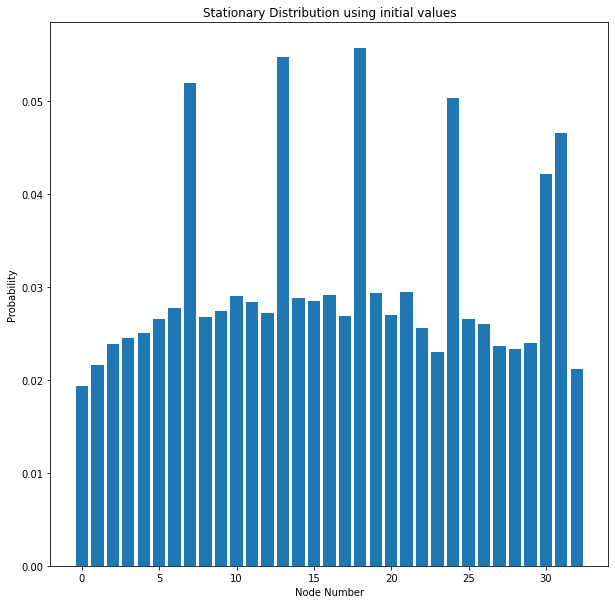

In [446]:
#初期状態での定常分布
x_label = [i for i in range(N)]
plt.figure(figsize=(10,10))
plt.title('Stationary Distribution using initial values')
plt.xlabel('Node Number')
plt.ylabel('Probability')
plt.bar(x_label, pi)

In [447]:
#目的間数値を求める
getObjective(pi)

9.752442244352513e-05

In [448]:
#等式制約
cons = ({'type':'eq','fun':getConstraint})
#bounds
lb = mu * (1 - gamma)
ub = mu * (1 + gamma)
#bounds = [(3,5), (5.625,9.375), (2.25,3.75), (7.5, 12.5)]
#Boundsクラスを利用して、bounds=Bounds(lb, ub),とする

In [449]:
# 最適化
res = minimize(getOptimize,             # 目的関数, 
                mu,                     # 初期解,
                method="trust-constr",  # 制約付き信頼領域法
                jac="2-point",          # 勾配関数
                hess=BFGS(),            # ヘシアンの推定方法
                constraints=cons,      # 制約
                bounds=Bounds(lb, ub),
                options={"maxiter": 50, # 最大反復数
                         "verbose":2})  # 最適化の過程を出力
print('説明変数μ = {0}'.format(res["x"]))
#最終結果
q = getTransitionRate(p, res['x'])
pi = getStationary_solve(q)
val = getObjective(pi)
print('定常分布pi = {0}'.format(pi))
print('目的間数値(最終) : {0}'.format(val))

| niter |f evals|CG iter|  obj func   |tr radius |   opt    |  c viol  |
|-------|-------|-------|-------------|----------|----------|----------|
|   1   |  34   |   0   | +9.7524e-05 | 1.00e+00 | 2.49e-05 | 0.00e+00 |
|   2   |  68   |   1   | +9.7515e-05 | 5.60e+00 | 1.93e-05 | 3.97e-09 |
|   3   |  102  |   2   | +9.7473e-05 | 8.08e+00 | 8.98e-06 | 8.31e-08 |
|   4   |  136  |   3   | +9.7536e-05 | 8.08e+00 | 6.19e-06 | 1.84e-07 |
|   5   |  136  |   3   | +9.7536e-05 | 4.04e+01 | 3.05e-06 | 1.84e-07 |
|   6   |  136  |   3   | +9.7536e-05 | 2.02e+02 | 2.42e-06 | 1.84e-07 |
|   7   |  136  |   3   | +9.7536e-05 | 1.01e+03 | 2.29e-06 | 1.84e-07 |
|   8   |  136  |   3   | +9.7536e-05 | 5.05e+03 | 2.27e-06 | 1.84e-07 |
|   9   |  136  |   3   | +9.7536e-05 | 2.53e+04 | 2.26e-06 | 1.84e-07 |
|  10   |  136  |   3   | +9.7536e-05 | 1.26e+05 | 2.26e-06 | 1.84e-07 |
|  11   |  204  |   4   | +9.7536e-05 | 1.26e+04 | 2.26e-06 | 1.84e-07 |
|  12   |  272  |   5   | +9.7536e-05 | 1.26e+03 | 

<BarContainer object of 33 artists>

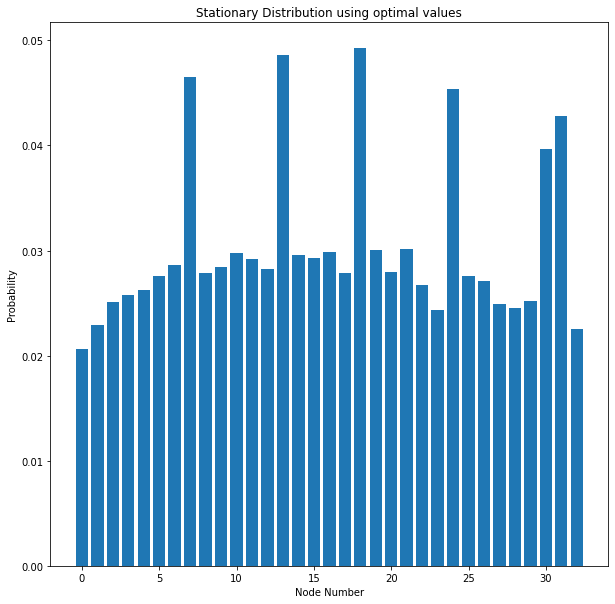

In [450]:
#最適化後の定常分布
x_label = [i for i in range(N)]
plt.figure(figsize=(10,10))
plt.title('Stationary Distribution using optimal values')
plt.xlabel('Node Number')
plt.ylabel('Probability')
plt.bar(x_label, pi)

<BarContainer object of 33 artists>

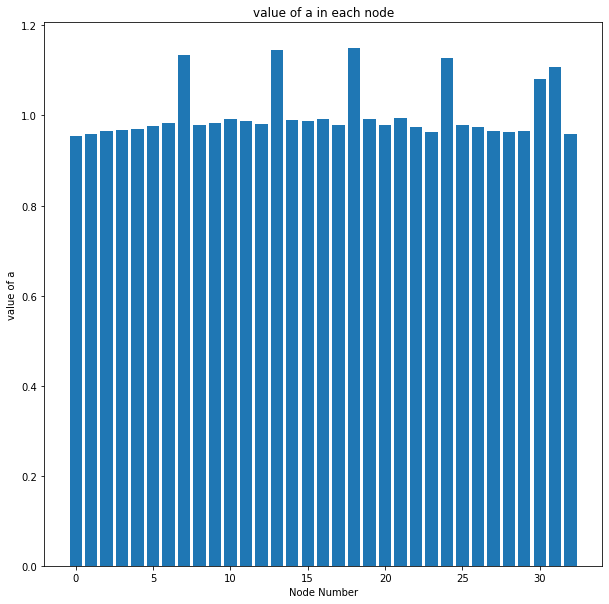

In [451]:
#最適化後の滞在率グラフ
x_label = [i for i in range(N)]
plt.figure(figsize=(10,10))
plt.title('value of a in each node')
plt.xlabel('Node Number')
plt.ylabel('value of a')
plt.bar(x_label, res['x'])

In [452]:
#滞在率の平均
sum(res['x']) / len(res['x'])

1.003143900221374

### 定常分布の最適化の結果を待ち行列(BCMP)としてみてみる
N = 33, R = 1, K = 500  
パラメタ：サービス率(上記の結果を利用)  

\begin{equation}
 D = \sum^K_{n=1}(|L_n-CP_n|+PT_n*I(\bar{A_n}))
\end{equation}

$L_n$: 拠点$n$における平均系内人数，$L_n = \sum_{r=1}^R L_{n,r} $  
$CP_n$: 拠点$n$における最大収容客数  
$PT_n$: 拠点$n$におけるペナルティ値  
$A_n$: 拠点$n$で安定が保たれている状態  
$I(A_n)$: 事象$A_n$に対する指示関数 

結果より  
ペナルティの値がBCMPでは影響が大きく、K * 0.1では目的関数値が逆に大きくなってしまった。このとき$\gamma$の値を0.5まであげたが、目的関数が元の値より下がらなかった。ペナルティをK * 0.05まで下げたら目的間数が元の値より下回った。


In [453]:
#理論値の取り込み (最適化前)
path = '/content/drive/MyDrive/研究/BCMP'
theoretical = pd.read_csv(path +'/csv/Theoretical33_K500_R1.csv')
N = 33
R = 1
K = [500]
K_total = 500
theoretical = np.array(theoretical) #numpy形式に変換
theoretical

array([[  0.53302896],
       [  0.63099924],
       [  0.7513782 ],
       [  0.79128012],
       [  0.81464212],
       [  0.91015121],
       [  0.98848987],
       [ 13.66139811],
       [  0.93042897],
       [  0.96815144],
       [  1.08693283],
       [  1.03449082],
       [  0.95427038],
       [ 48.41505181],
       [  1.07191611],
       [  1.04794388],
       [  1.094384  ],
       [  0.93064907],
       [396.5084686 ],
       [  1.1089108 ],
       [  0.93712643],
       [  1.12284333],
       [  0.84850507],
       [  0.70610036],
       [  9.30116624],
       [  0.90993801],
       [  0.88173076],
       [  0.74523001],
       [  0.72008531],
       [  0.75433664],
       [  3.05955881],
       [  5.16459673],
       [  0.61581572]])

In [454]:
capacity = np.full(N, K_total // N + 1) #各拠点のキャパ：今は平均
pnenalty = np.full(N , K_total * 0.05) #ペナルティ値は網内人数の5%としてみる

In [455]:
def getObjective(l, capacity, pnenalty):
  sum = 0
  for i in range(len(l)):
    sum += np.abs(l[i] - capacity[i])
    if l[i] > capacity[i]:
      sum += pnenalty[i]
  return sum

In [456]:
#最適化前の目的間数値
getObjective(theoretical, capacity, pnenalty)

array([903.84704086])

In [457]:
#パラメタ設定
mu = np.array(res['x']).reshape(R, N)
type_list = np.full(N, 1) #サービスタイプはFCFS
m = np.full(N, 1) #今回は窓口数1(複数窓口は実装できていない)

In [458]:
import sys
sys.path.append('/content/drive/MyDrive/研究/BCMP/')
import BCMP_MVA_Class as mdl
bcmp = mdl.BCMP_MVA_Class(N, R, K, mu, type_list, p, m)

In [459]:
import time
start = time.time()
L = bcmp.getMVA()
elapsed_time = time.time() - start
print ("calclation_time:{0}".format(elapsed_time) + "[sec]")
print('L = \n{0}'.format(L))

calclation_time:0.7132124900817871[sec]
L = 
[[  0.72127155]
 [  0.86523731]
 [  1.0429903 ]
 [  1.10180686]
 [  1.13452891]
 [  1.27424404]
 [  1.38656683]
 [ 17.04625407]
 [  1.30348981]
 [  1.35693578]
 [  1.52590682]
 [  1.45165149]
 [  1.33658123]
 [ 57.46704403]
 [  1.50529204]
 [  1.47242044]
 [  1.53643709]
 [  1.30382171]
 [369.66932683]
 [  1.55624803]
 [  1.31276172]
 [  1.57784355]
 [  1.1841175 ]
 [  0.97603909]
 [ 11.72609205]
 [  1.27318572]
 [  1.23406003]
 [  1.03413524]
 [  0.99663482]
 [  1.04693799]
 [  4.05884696]
 [  6.67825047]
 [  0.84303968]]


In [460]:
#最適化後の目的関数値
getObjective(L, capacity, pnenalty)

array([895.36524986])